In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
features, targets = make_classification(n_samples = 20,
                                      n_features = 2,
                                      n_informative = 1,
                                      n_redundant = 0,
                                      n_clusters_per_class = 1,
                                      random_state = 1)

In [3]:
df = pd.DataFrame(data=features, columns=['x1', 'x2'])
df['targets'] = targets
df.head()

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0


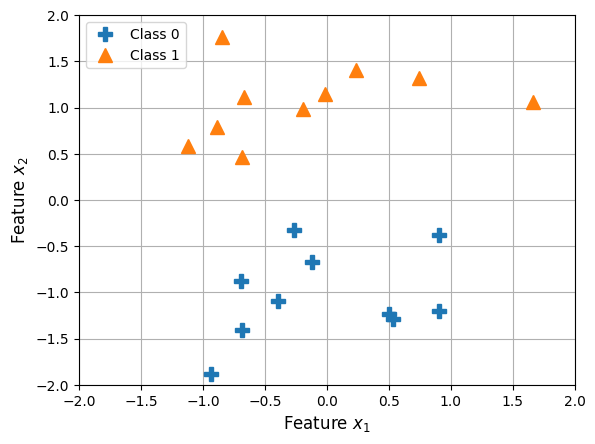

In [4]:
plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker = '^',
    markersize = 10,
    linestyle = '',
    label = 'Class 1')
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

In [ ]:
#Build Simple Neural Network(Perceptron)
#First initialize weights and bias
#Use forward propagation to learn from data by applying formula 
#
class Perceptron():

  def __init__(self, num_features):
    #Initialize number of features
    self.num_features = num_features
    #Initialize weights
    self.weights = [0 for i in range(num_features)]
    #Initialize bias
    self.bias = 0

  def forward(self, features):
    weighted_sum = self.bias
    for i, _ in enumerate(self.weights):
      weighted_sum += features[i] * self.weights[i]
    if weighted_sum > 0:
      prediction = 1
    else:
      prediction = 0
    return prediction
  
  #Train based on forward
  def training(self, features, y_true, epochs):
    for epoch in range(epochs):
      error = 0
      for x, y in zip(features, y_true):
        predictions = self.forward(x)
        error += abs(predictions - y)
      print(f"Epoch {epoch + 1} error {error}")
  

    
ppn = Perceptron(num_features = 2)
ppn.training(features, targets, 5)

Epoch 1 error 10
Epoch 2 error 10
Epoch 3 error 10
Epoch 4 error 10
Epoch 5 error 10


In [17]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x, y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)

In [18]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model Accuracy:", train_acc)

Model Accuracy: 0.5


In [19]:
def plot_boundary(model):

    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias
    num = 1 / 100000000
    # z = w1*x1 + w2*x2 + b = 0
    # => x2 = (-w1*x1 - b) / w2

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / (w2 + num)

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / (w2 + num)

    return x1_min, x1_max, x2_min, x2_max

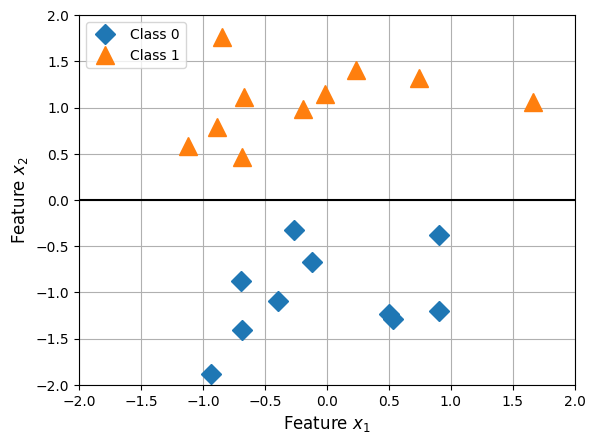

In [20]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

# Plot the decision boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()